C:\Users\knit\anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['1월 20일', '1월 24일', '1월 26일', '1월 27일', '1월 30일', '1월 31일', '2월 1일',
       '2월 2일', '2월 4일', '2월 5일',
       ...
       '7월 2일', '7월 3일', '7월 4일', '7월 5일', '7월 6일', '7월 7일', '7월 8일', '7월 9일',
       '7월 10일', '7월 11일'],
      dtype='object', name='date', length=164)

C:\Users\knit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\knit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\knit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\knit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


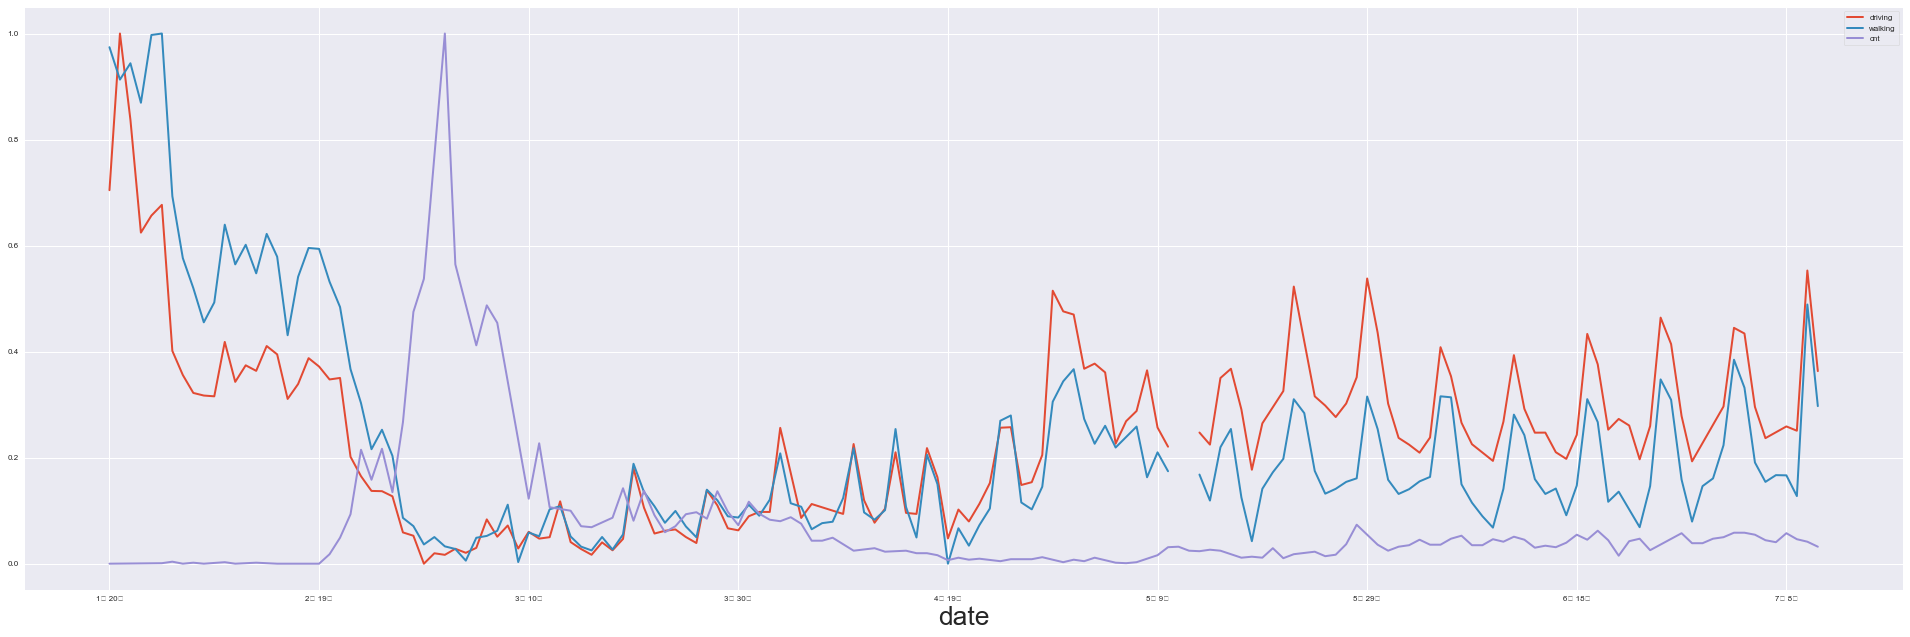

In [302]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
#from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

km = pd.read_csv('d:\\data\\csv\\korea_move.csv',
                 header=None,
                 encoding='cp949')
url2 = pd.read_html("d:\\data\\csv\\실습파일\\sample2.html")

dcnt = url2[5][2].str.split('+').str[1].str.split(')').str[0]
d = url2[5][1]

r = pd.DataFrame({'date': d, 'cnt': dcnt})[2:-2]

k = km.T[6:]
tk = k[0].str.split('-')

#pd.to_numeric(tk.str[1]).apply(str)+"월 "+pd.to_numeric(tk.str[2]).apply(str)+'일'

k['date'] = pd.to_numeric(tk.str[1]).apply(str) + "월 " + pd.to_numeric(
    tk.str[2]).apply(str) + '일'

me = pd.merge(k, r, on='date')
#print(me)

me.dtypes

#me['driving'] = me.driving.astype(float)
me.set_index('date', inplace=True)
me[1] = pd.to_numeric(me[1])
me[2] = pd.to_numeric(me[2])
# for i in range(len(me)):
#     me['cnt'][i] = me['cnt'][i].replace(',', '')

# for k, i in enumerate(me['cnt']):
#     me['cnt'][k] = re.sub('[^0-9]','',i)

for i in range(len(me)):
    me['cnt'][i] = re.sub('[^0-9]','',me['cnt'][i])

me['cnt'] = pd.to_numeric(me['cnt'])
#print(me.corr())

me.columns = [0,'driving','walking','cnt']

me.corr()
result = me.iloc[:,1:4]
result

result[:] = MinMaxScaler().fit_transform(result[:])
result
# result2=preprocessing.StandardScaler().fit(result).transform(result)
# pd.DataFrame(result2)


plt.rcParams["figure.figsize"] = (30,10) # (가로, 세로)

plt.rcParams.update({'font.size': 22}) # 글자 크기
k = result.plot(kind='line')
#k.set_xticklabels(result.index, rotation=30)
result.index



#result

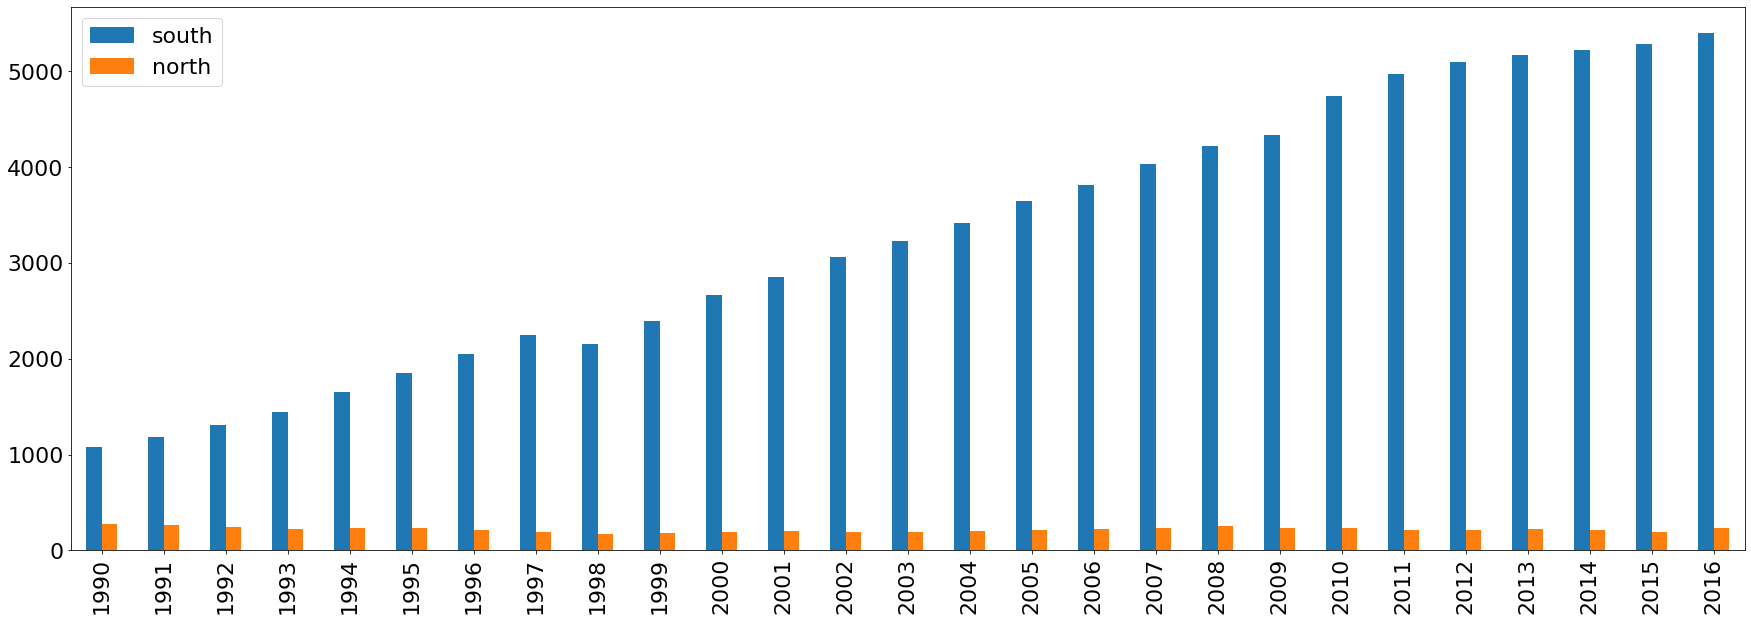

In [92]:
sn = pd.read_excel("d:\\data\\csv\\실습파일\\남북한발전전력량.xlsx")
#sn[sn.iloc[:,0].isna()==0]
x = sn.iloc[[0,5],2:]
x.index= ['south','north']
x.T.plot.bar()

In [93]:


import pandas as pd
import matplotlib.pyplot as plt

dict_data = {'week': [1,2,3,4,5], 'cars':[1,3,6,4,9], 'truck':[2,5,4,5,12]}

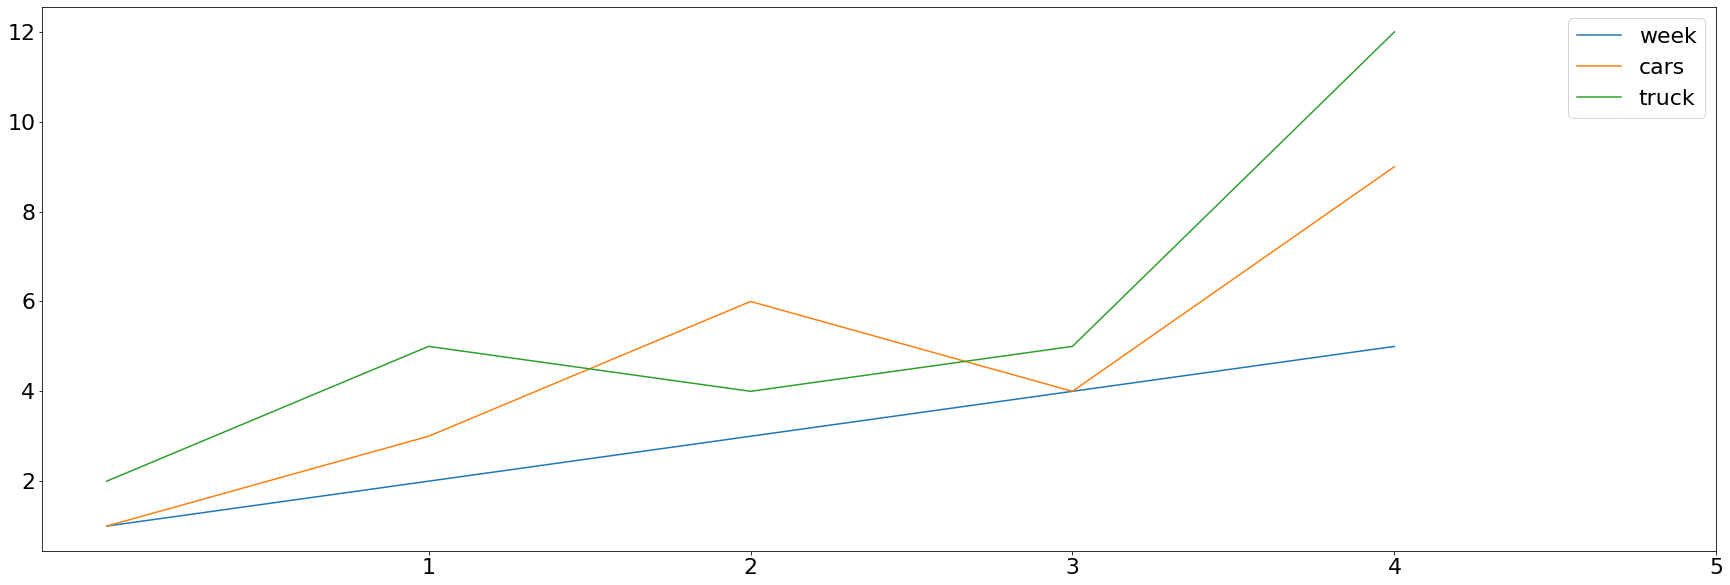

In [112]:
df = pd.DataFrame(dict_data)

#fig = plt.figure(figsize = (10,8))
#ax = fig.add_subplot(1,1,1)
ax = df.plot.line()
ax.set_xticks((1,2,3,4,5))
#ax.set_xticklabels(('mon','tue','wed','thur','fir'))
ax

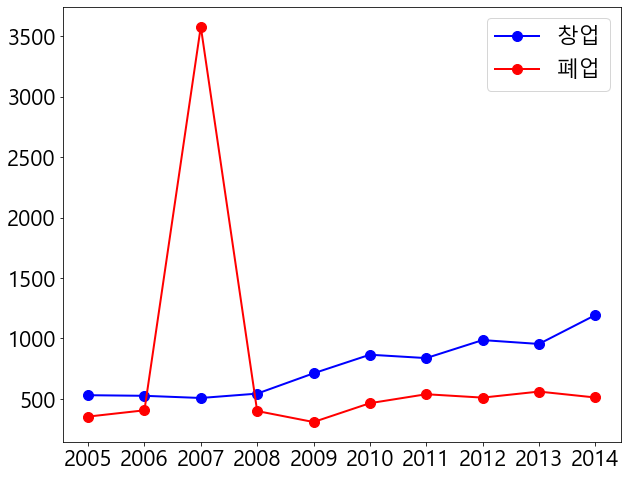

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결

from matplotlib import font_manager, rc


font_path = "d:\\data\\csv\\실습파일\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# 열이름을 key로 하고, 리스트를 value로 갖는 딕셔너리 정의(2차원 배열)
aa = pd.read_csv("d:\\data\\csv\\창업건수.csv",encoding='cp949')
bb = pd.read_csv("d:\\data\\csv\\폐업건수.csv",encoding='cp949')

# 그래프 크기 지정
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

# 그래프 색 & 마커모양 지정
ax.plot(aa['치킨집'], marker='o', markerfacecolor='blue',markersize=10, color='blue', linewidth=2)

ax.plot(bb['치킨집'], marker='o', markerfacecolor='red',markersize=10, color='red', linewidth=2)

# x축의 라벨을 지정한다.
ax.set_xticks((0,1,2,3,4,5,6,7,8,9))
ax.set_xticklabels( (2005,2006,2007,2008,2009,2010,2011,2012,2013,2014) )
plt.legend( labels=['창업','폐업'])

plt.show()



In [129]:
import pandas as pd
import matplotlib.pyplot as plt

pp = pd.read_excel("d:\\data\\csv\\실습파일\\시도별 전출입 인구수.xlsx", header= 0)
pp = pp.fillna(method = 'ffill')
pp


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [132]:
pp.columns

Index(['전출지별', '전입지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [141]:
pp[['전출지별','전입지별']][(pp.전출지별 == '서울특별시')& (pp.전입지별!='서울특별시')]


,전출지별,전입지별
19,서울특별시,전국
21,서울특별시,부산광역시
22,서울특별시,대구광역시
23,서울특별시,인천광역시
24,서울특별시,광주광역시
25,서울특별시,대전광역시
26,서울특별시,울산광역시
27,서울특별시,세종특별자치시
28,서울특별시,경기도
29,서울특별시,강원도


In [149]:
pp[['전출지별','전입지별']][pp.전출지별 == '서울특별시'][pp.전입지별 != '서울특별시']

C:\Users\knit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,전출지별,전입지별
19,서울특별시,전국
21,서울특별시,부산광역시
22,서울특별시,대구광역시
23,서울특별시,인천광역시
24,서울특별시,광주광역시
25,서울특별시,대전광역시
26,서울특별시,울산광역시
27,서울특별시,세종특별자치시
28,서울특별시,경기도
29,서울특별시,강원도


In [174]:
df_seoul = pp[(pp.전출지별 == '서울특별시')& (pp.전입지별!='서울특별시')]
df_seoul.rename( {'전출지별':'전출지','전입지별':'전입지'},axis=1, inplace = True)
df_seoul

C:\Users\knit\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,전출지,전입지,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,서울특별시,경기도,130149,150313,93333,143234,149045,253705,202276,207722,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,서울특별시,강원도,9352,12885,13561,16481,15479,27837,25927,25415,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [179]:
df_seoul.drop('전출지',axis=1,inplace=True)

C:\Users\knit\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [173]:
df_seoul.rename({'전입지별':'전입지'}, axis =1 , inplace=True)
df_seoul

C:\Users\knit\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
28,경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433
29,강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


In [214]:
#df_seoul.set_index('전입지',inplace=True)
df_seoul.loc[['전국','경기도'],:]


TypeError: bad operand type for unary -: 'list'

In [234]:
df_seoul.loc[-'경기도']

TypeError: bad operand type for unary -: 'str'

TypeError: Index(...) must be called with a collection of some kind, '전국' was passed

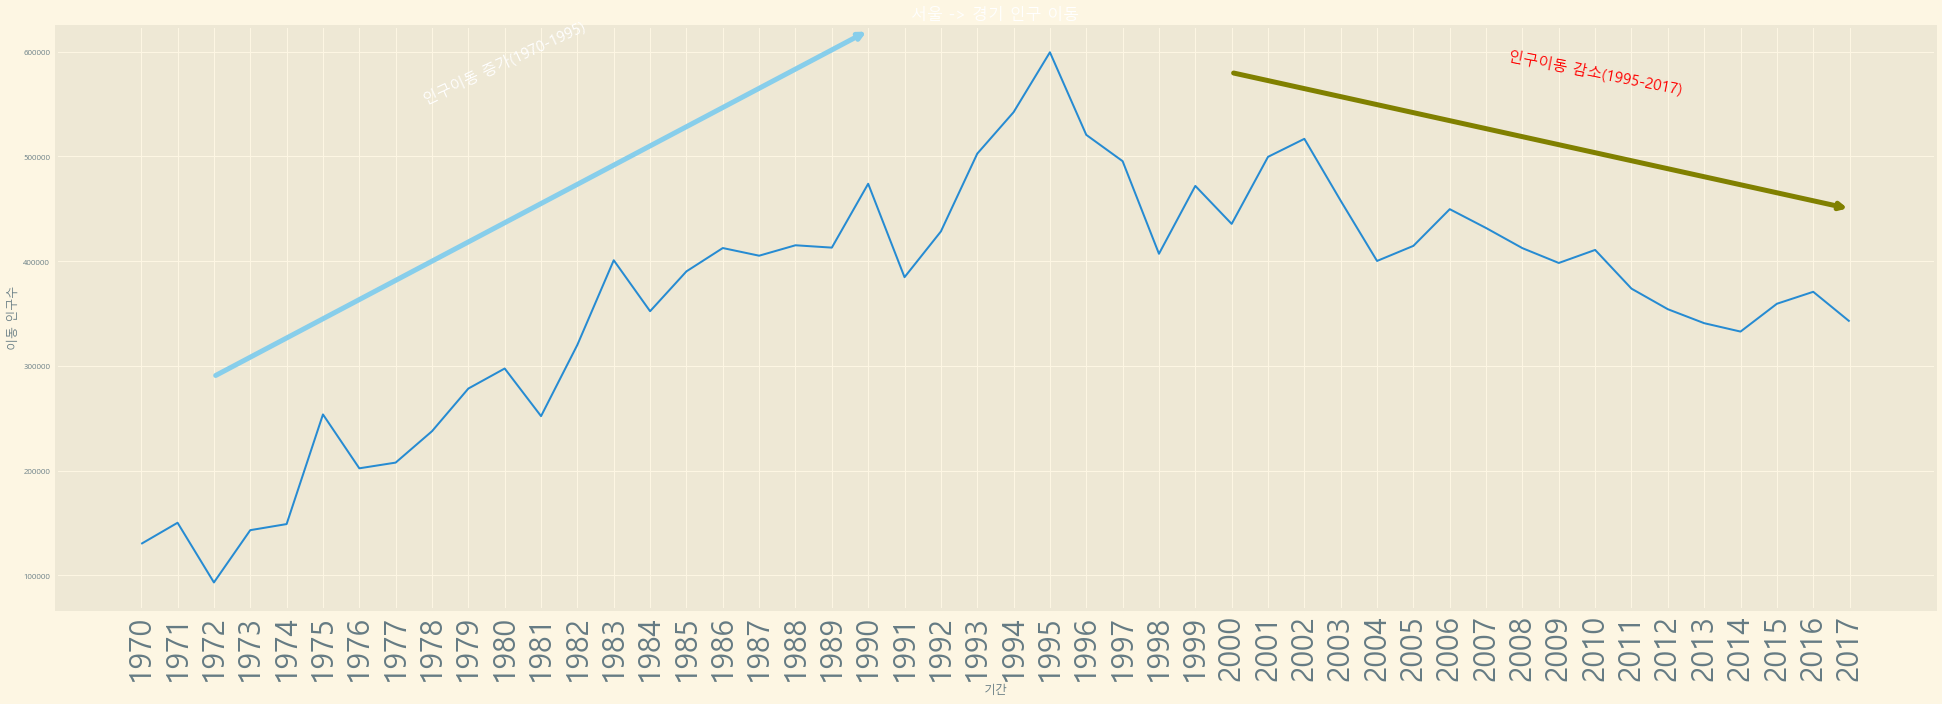

In [264]:
plt.plot(result.index, result.values)
plt.xticks(size=30, rotation='vertical')
# matplotlib 한글 폰트 오류 문제 해결

from matplotlib import font_manager, rc

font_path = "d:\\data\\csv\\실습파일\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 제목 추가

plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.style.use('Solarize_Light2')



plt.rcParams["figure.figsize"] = (30,10) # (가로, 세로)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 550000),            #텍스트 위치 기준점
             rotation=25,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(40, 560000),            #텍스트 위치 기준점
             rotation=-11,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
            color="red"
             )
plt.xlabel('기간')

plt.ylabel('이동 인구수')

plt.show()

In [239]:
import matplotlib.pyplot as plt
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


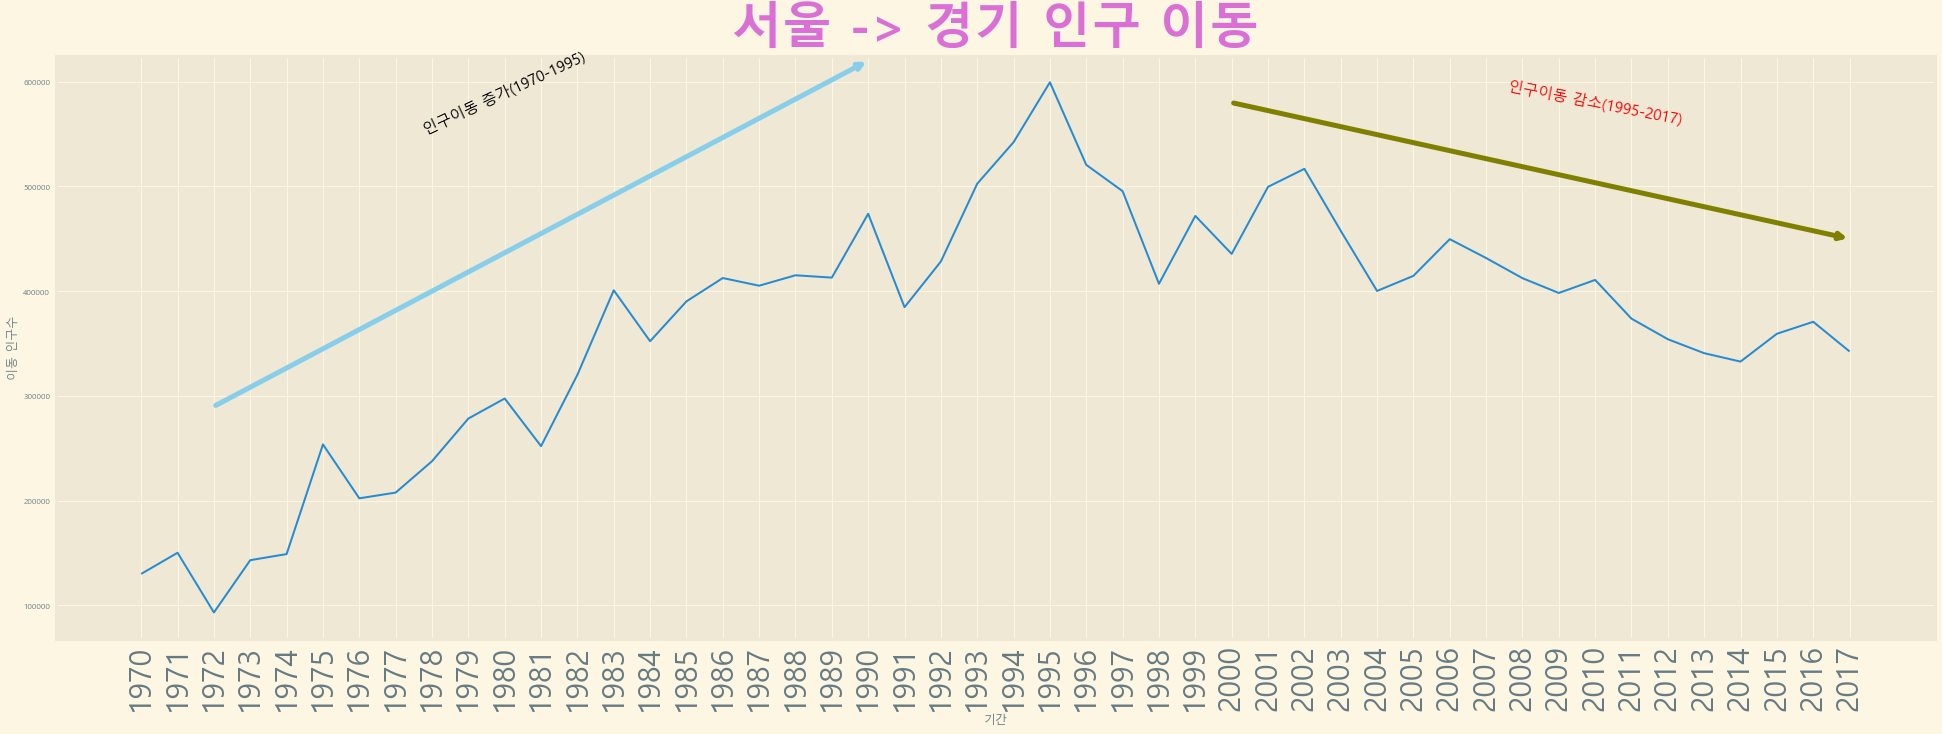

In [275]:
plt.plot(result.index, result.values)
plt.xticks(size=30, rotation='vertical')
# matplotlib 한글 폰트 오류 문제 해결

from matplotlib import font_manager, rc

font_path = "d:\\data\\csv\\실습파일\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 제목 추가

plt.title('서울 -> 경기 인구 이동',color='orchid',size = 50 , weight='bold')

# 축이름 추가
plt.style.use('grayscale')



plt.rcParams["figure.figsize"] = (30,10) # (가로, 세로)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000),       #화살표의 머리 부분(끝점)
             xytext=(2, 290000),    #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
             )

plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 550000),            #텍스트 위치 기준점
             rotation=25,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(40, 560000),            #텍스트 위치 기준점
             rotation=-11,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
            color="red"
             )
plt.xlabel('기간')

plt.ylabel('이동 인구수')

plt.show()

In [266]:
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


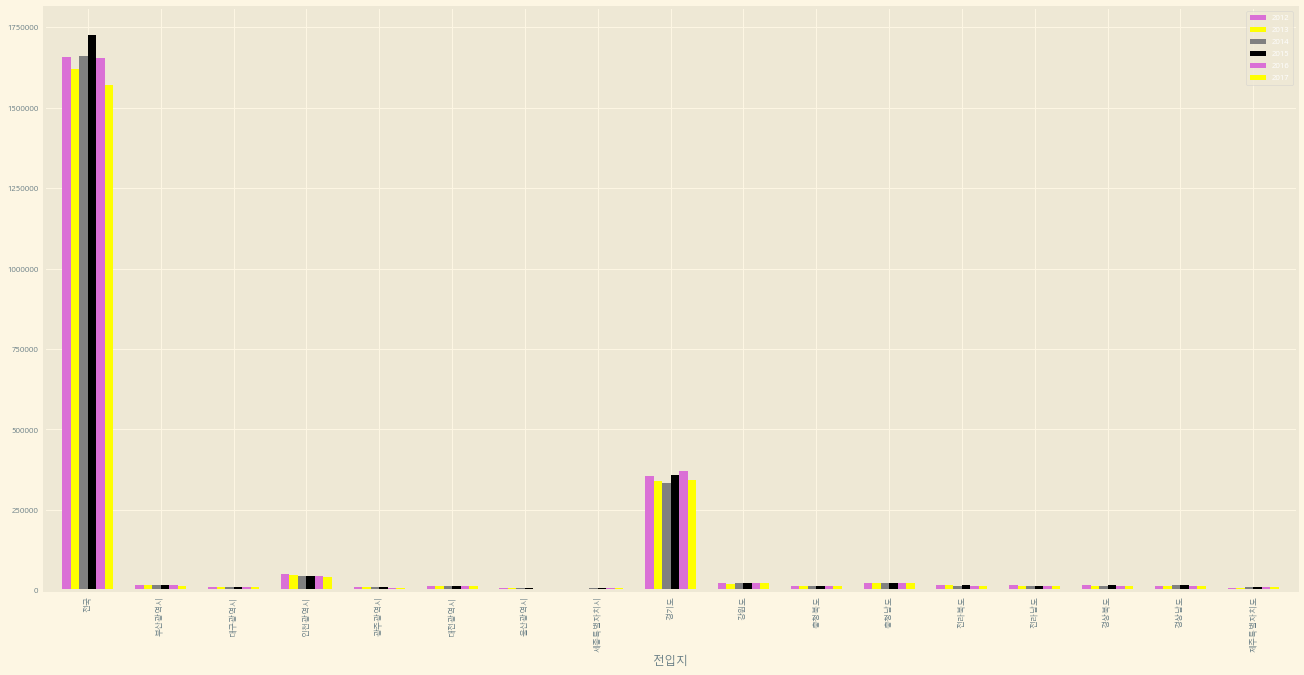

In [267]:
df_seoul.plot(kind = 'bar', figsize = (20,10) , width = 0.7, color = ['orchid','yellow','gray','black'])



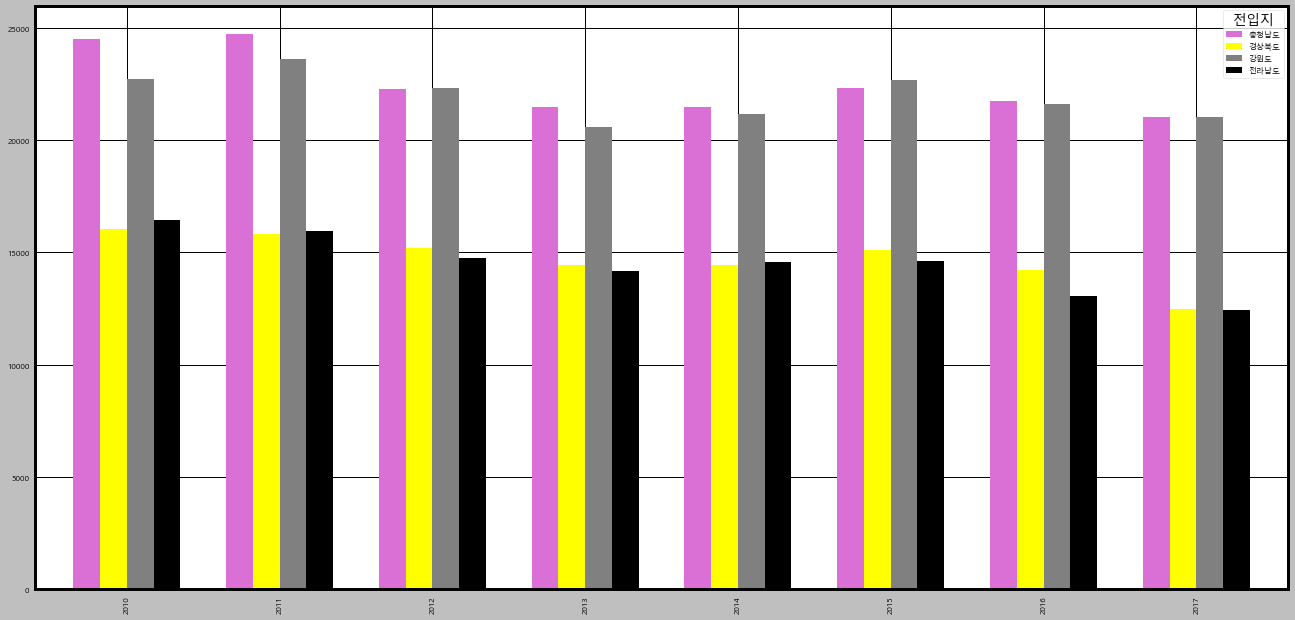

In [276]:
df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],'2010':'2017'].T.plot(kind = 'bar', figsize = (20,10) , width = 0.7, color = ['orchid','yellow','gray','black'])

In [278]:
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],'2010':'2017'].T
df_4

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


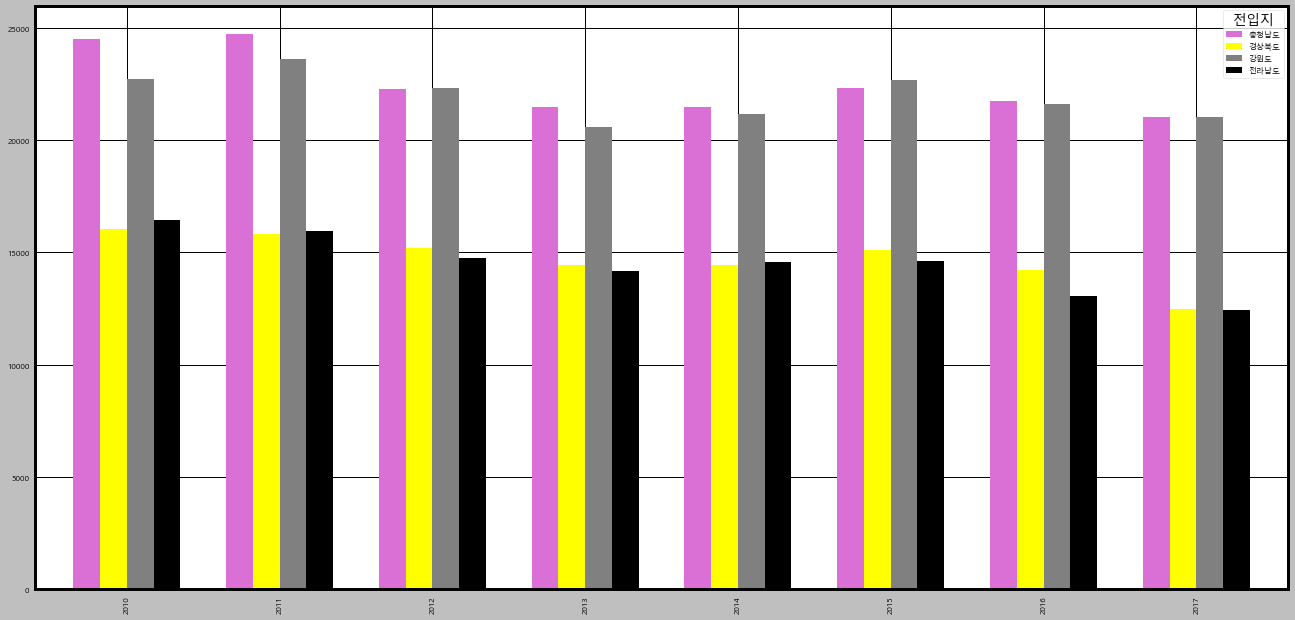

In [281]:
df_4.plot(kind = 'bar', figsize = (20,10) , width = 0.7, color = ['orchid','yellow','gray','black'])


Text(0.5, 1.0, '연도별창업건수')

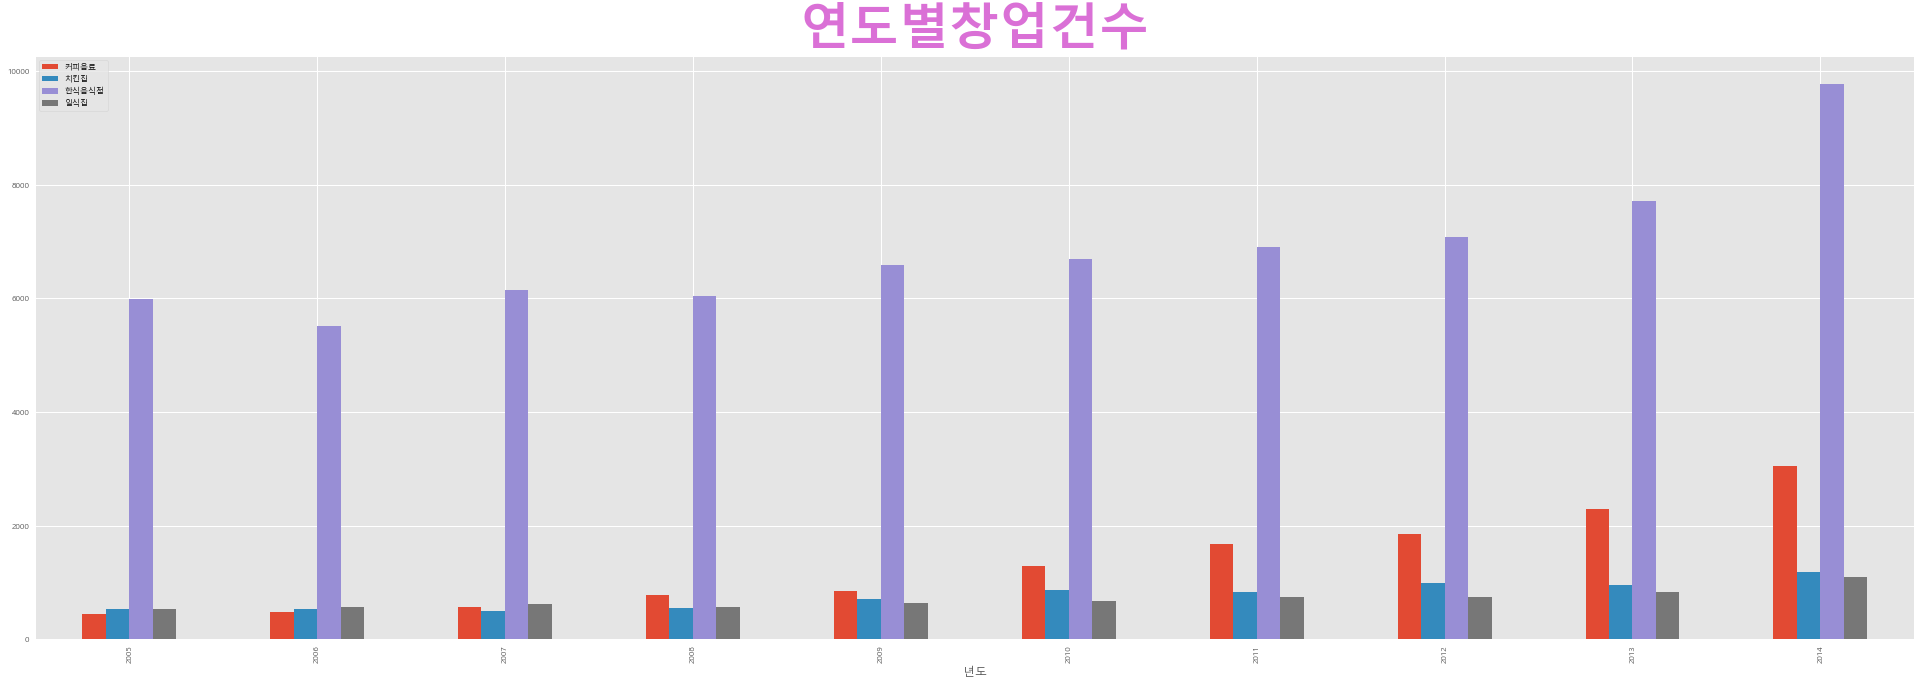

In [296]:
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결

from matplotlib import font_manager, rc


font_path = "d:\\data\\csv\\실습파일\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# 열이름을 key로 하고, 리스트를 value로 갖는 딕셔너리 정의(2차원 배열)
aa = pd.read_csv("d:\\data\\csv\\창업건수.csv",encoding='cp949')
bb = pd.read_csv("d:\\data\\csv\\폐업건수.csv",encoding='cp949')

aaa=aa[['년도','커피음료','치킨집','한식음식점','일식집']]#.plot.bar()
aaa.set_index('년도', inplace = True)
aaa.plot.bar()
plt.title('연도별창업건수',color='orchid',size = 50 , weight='bold')


In [297]:
import seaborn as sns

tat = sns.load_dataset('titanic')
tat.head()
tat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [298]:
tat[['age','fare']]

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


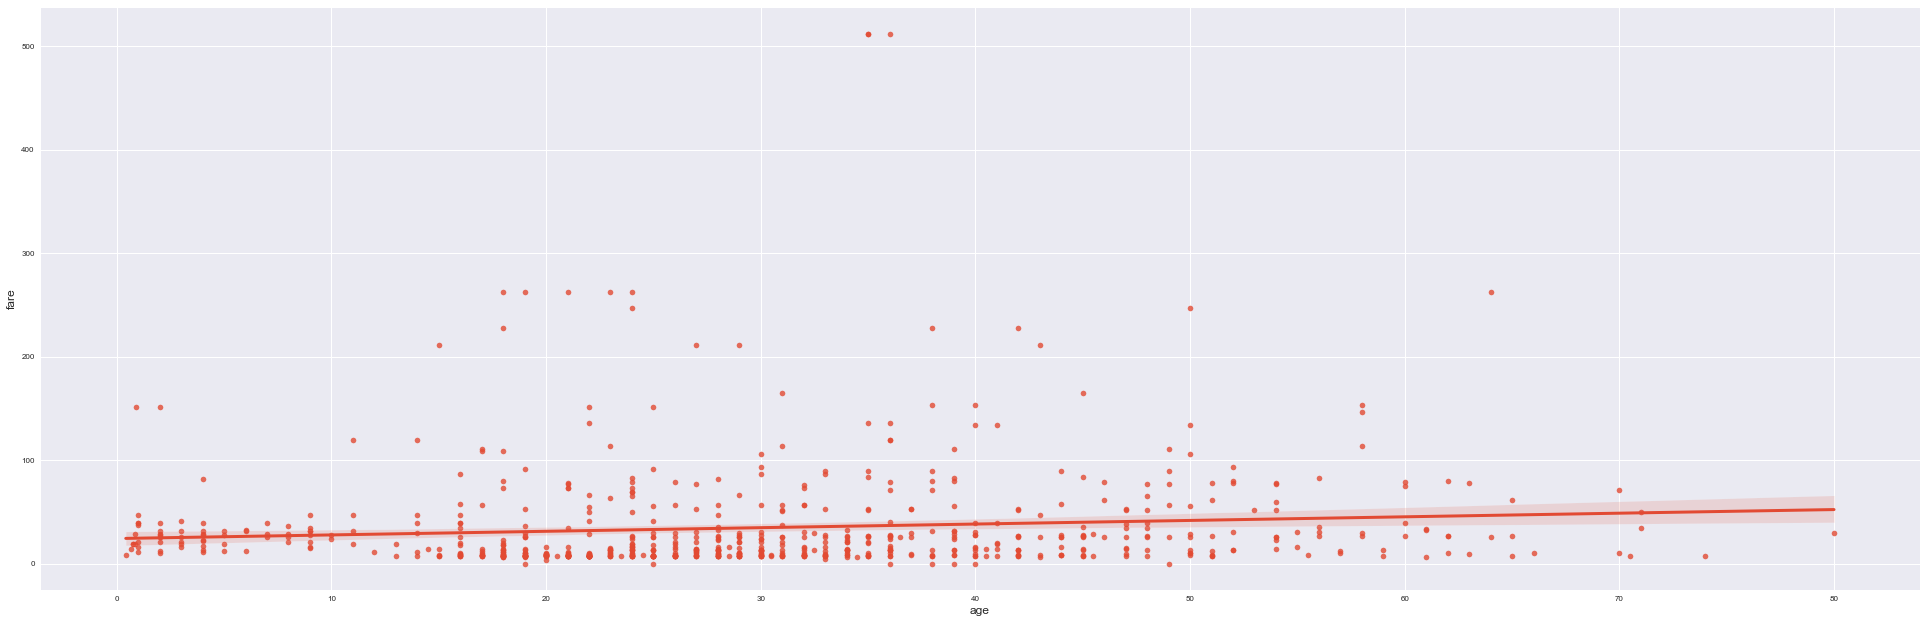

In [301]:
sns.set_style('darkgrid')
sns.regplot(x='age',y='fare',data = tat, fit_reg = True)
plt.show()

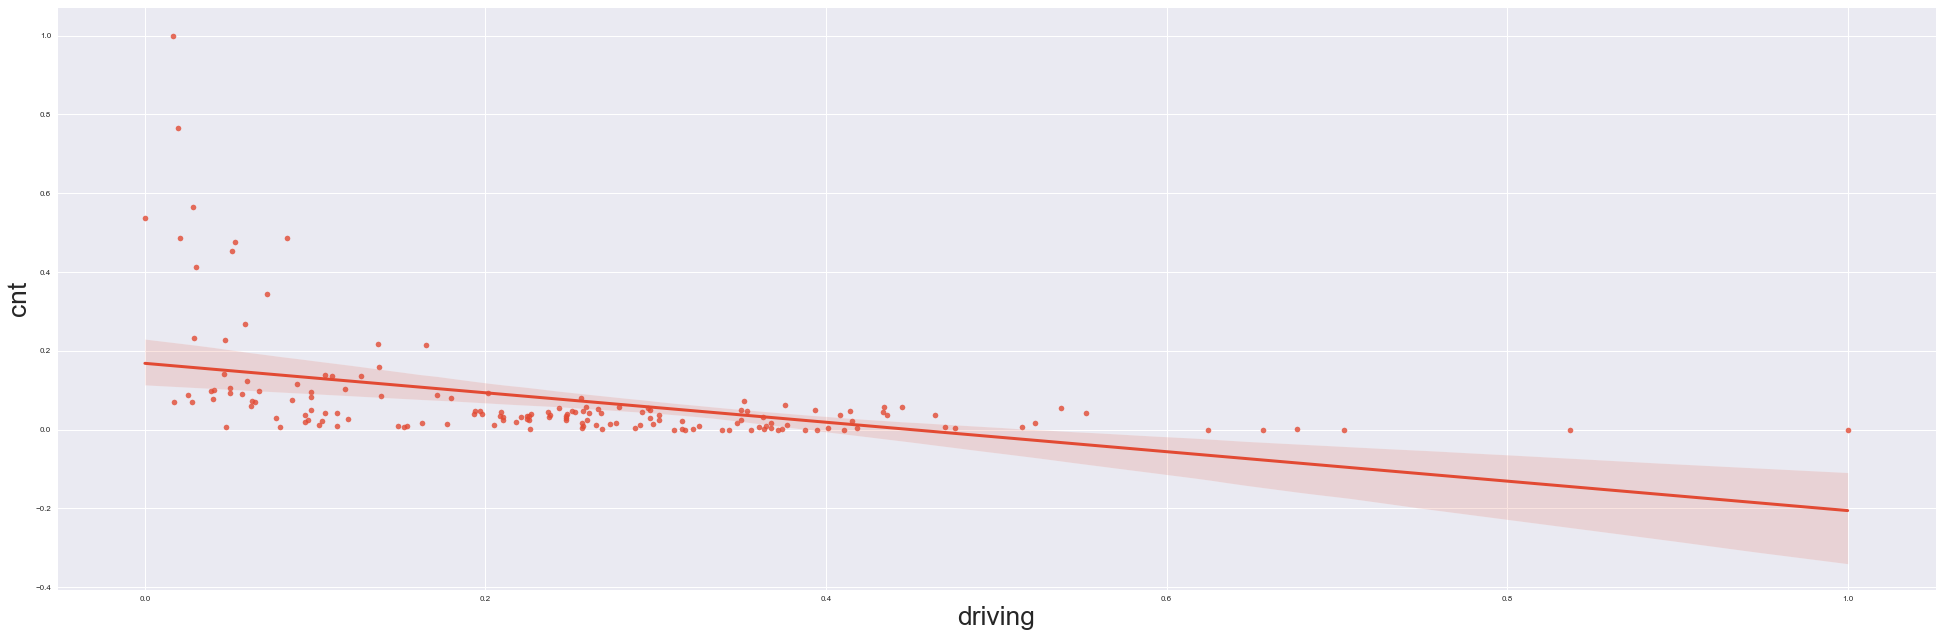

In [304]:
result[:] = MinMaxScaler().fit_transform(result[:])
result
sns.regplot(x='driving',y='cnt',data = result)

In [305]:
result

,driving,walking,cnt
date,,,
1월 20일,0.704473,0.974149,0.000000
1월 24일,1.000000,0.913073,0.000000
1월 26일,0.837184,0.943879,0.000000
1월 27일,0.624478,0.869408,0.000000
1월 30일,0.656550,0.997187,0.000000
...,...,...,...
7월 7일,0.247850,0.167024,0.040528
7월 8일,0.258909,0.166622,0.057493
7월 9일,0.250799,0.127511,0.046183
